# LSTM

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt
import random

# Set Seed

In [2]:
random.seed(10)

# Load Data

In [3]:
#agg_data_monthly = pd.read_csv("aggregate_data_daily.csv", parse_dates=True)
#agg_data_monthly['date'] = pd.to_datetime(agg_data_monthly.date).dt.strftime("%Y-%m")
#agg_data_monthly.sort_values(by='date',ascending=False)
#agg_data_monthly = agg_data_monthly.groupby(["date"]).mean()
#agg_data_monthly.index = pd.DatetimeIndex(agg_data_monthly.index)

In [4]:
df = pd.read_csv('aggregate_data_daily.csv')
df1 = df['close']
df1

0       131288.958237
1       131832.877280
2       129468.922827
3       129249.723173
4       127985.717387
            ...      
1764    257670.968933
1765    259022.745291
1766    258462.879837
1767    259788.447905
1768    260920.830000
Name: close, Length: 1769, dtype: float64

### Monthly

In [5]:
df1_max = max(df['close'])
df1_min = min(df['close'])

# Data Preprocessing

In [6]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [7]:
training_size=int(len(df1)*0.8)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [8]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

# Train/Test Split

In [9]:
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_train2, y_train2 = X_train, y_train
X_test, y_test = create_dataset(test_data, time_step)
X_test2, y_test2 = X_test, y_test

In [10]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [11]:
X_train.shape[1]

100

# Model

In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.8))  # add a dropout layer with rate 0.8
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.8))  # add a dropout layer with rate 0.8
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21,121
Trainable params: 21,121
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train, y_train, epochs=20, batch_size=64, shuffle=False)

Epoch 1/20
21/21 [==============================] - 3s 39ms/step - loss: 0.0570
Epoch 2/20
21/21 [==============================] - 1s 35ms/step - loss: 0.0375
Epoch 3/20
21/21 [==============================] - 1s 34ms/step - loss: 0.0309
Epoch 4/20
21/21 [==============================] - 1s 36ms/step - loss: 0.0236
Epoch 5/20
21/21 [==============================] - 1s 37ms/step - loss: 0.0198
Epoch 6/20
21/21 [==============================] - 1s 38ms/step - loss: 0.0183
Epoch 7/20
21/21 [==============================] - 1s 39ms/step - loss: 0.0173
Epoch 8/20
21/21 [==============================] - 1s 40ms/step - loss: 0.0152
Epoch 9/20
21/21 [==============================] - 1s 39ms/step - loss: 0.0154
Epoch 10/20
21/21 [==============================] - 1s 39ms/step - loss: 0.0149
Epoch 11/20
21/21 [==============================] - 1s 40ms/step - loss: 0.0147
Epoch 12/20
21/21 [==============================] - 1s 40ms/step - loss: 0.0121
Epoch 13/20
21/21 [==================

# Prediction

In [15]:
test_predict = model.predict(X_test)

8/8 [==============================] - 1s 10ms/step


In [16]:
print(f'MSE {mean_squared_error(y_test2, test_predict)}')
print(f'R2 {r2_score(y_test2, test_predict)}')
print(f'MAE {math.sqrt(mean_squared_error(y_test2, test_predict))}')

MSE 0.023333751669466676
R2 -2.812279628640711
MAE 0.15275389248548357


In [17]:
test_predict= scaler.inverse_transform(test_predict)
train_predict = model.predict(X_train)
train_predict=scaler.inverse_transform(train_predict)

42/42 [==============================] - 0s 10ms/step


In [18]:
train_predict

array([[134127.39],
       [134580.12],
       [134611.94],
       ...,
       [212288.97],
       [212522.36],
       [213182.52]], dtype=float32)

In [19]:
y_test2 = (y_test * (df1_max - df1_min)) + df1_min
y_test2

array([270935.22486487, 271628.08      , 269655.11689008, 267660.90506667,
       269341.54959459, 271163.46847222, 271170.41324324, 271007.99291553,
       269618.15898123, 268280.13162162, 267585.96607629, 265818.29182306,
       270513.56345109, 270177.32613333, 271686.5956044 , 271663.81854396,
       273954.55797297, 275275.28973333, 276880.45581081, 276188.84919137,
       272373.80831099, 270379.49180108, 270737.04773333, 268079.85586667,
       270093.60748663, 271970.71644022, 269055.14931129, 267922.54609164,
       270368.14373333, 271971.74493333, 271131.4916442 , 272539.5225    ,
       273363.82024169, 274988.58898072, 274163.25906516, 272413.5108871 ,
       273655.00969945, 275861.51321526, 275432.58355795, 274772.47472222,
       271065.8712    , 265851.40666667, 265490.58619303, 266841.30407609,
       264790.60910543, 261289.85786667, 258941.57754011, 260395.37700535,
       260326.43342246, 262209.90733333, 262477.60756757, 264787.58946667,
       262589.72173333, 2

In [20]:
print(f'MSE {mean_squared_error(y_test2, test_predict)}')
print(f'R2 {r2_score(y_test2, test_predict)}')
print(f'MAE {math.sqrt(mean_squared_error(y_test2, test_predict))}')

MSE 672766454.4304233
R2 -2.81227818419335
MAE 25937.741891506732


In [21]:
look_back = 100

trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

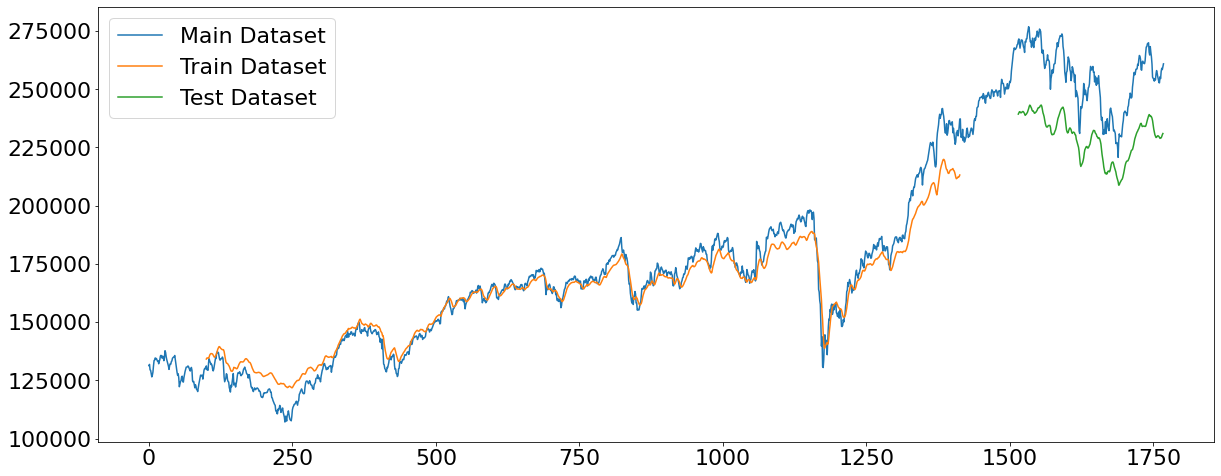

In [22]:
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})
plt.plot(scaler.inverse_transform(df1), label = 'Main Dataset')
plt.plot(trainPredictPlot, label = 'Train Dataset')
plt.plot(testPredictPlot, label = 'Test Dataset')
plt.legend()